# Machine Learning

## Import packages

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Grasping data

In [2]:
df = pd.read_csv("data/BankChurners.csv")

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

- CLIENTNUM: client identification number
- Attrition_Flag **TARGET**: still client or gone one (attrited). Existing Customer/Attrited Customer 
- Customer_Age: int
- Gender: M/F
- Dependent_count: dependants (personnes à charge), int
- Education_Level: Graduate, High School, Unknown, Uneducated, College, Post-Graduate, Doctorate (to put in order!!)
- Marital_Status: Married, Single, Unknown, Divorced
- Income_Category: Less than $40K, $40K - $60K, $60K - $80K, $80K - $120K, $120K +, Unknown
- Card_Category: Blue, Silver, Gold, Platinum
- Months_on_book: "time use"
- Total_Relationship_Count: Amount of products in the bank
- Months_Inactive_12_mon: inactive months in the last 12 months
- Contacts_Count_12_mon
- Credit-Limit
- Total_Revolving_bal: revolve a balance is not pay it off at the end of the month
- Avg_Open_To_Buy: difference between the credit limit and the present balance (what the client can still spend)
- Total_Amt_Chng_Q4_Q1: Change in transaction amount from the first to the fourth quarter
- Total_Trans_Amt: over the year
- Total_Trans_Ct: over the year
- Total_Ct_Chng_Q4_Q1: change in transaction count from the 1st to the 4th quarter
- Avg_Utilization_Ratio: credit card debt (total revolving balance) divided by credit card limits


In [37]:
for element in df.value_counts("Months_Inactive_12_mon").index.to_list():
    print(element)

3
2
1
4
5
6
0


In [39]:
df = df.drop(columns=["CLIENTNUM"])

In [41]:
#Attrition_Flag: Attrited Customer = 1, Existing Customer = 0
df["Attrition_Flag"] = df[["Attrition_Flag"]].applymap(lambda x: 1 if x =="Attrited Customer" else 0)

In [43]:
# Gender: F = 1, M = 0
df["Gender"] = df[["Gender"]].applymap(lambda x: 1 if x == "F" else 0)

In [46]:
df = df.applymap(lambda x: "NaN" if x == "Unknown" else x)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,0,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,1,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,0,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='count'>

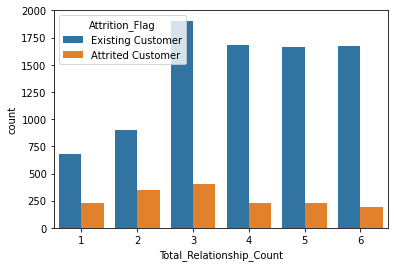

In [35]:
sns.countplot(data=df,x="Total_Relationship_Count", hue="Attrition_Flag")

In [27]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    disrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate,

In [38]:
df[df["Months_Inactive_12_mon"]==6]["Months_on_book"]

12       36
118      36
313      47
477      53
570      38
         ..
9596     36
9605     31
9932     34
10035    36
10066    46
Name: Months_on_book, Length: 124, dtype: int64